#ホテリング法

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from statistics import mean, variance
from scipy import stats

In [0]:
# データセットの読み込み
num = []
data = []
with open('Davis.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    for row in reader:
        num.append(int(row[0]))  #標本番号を取得
        data.append(int(row[2])) #体重データを取得

In [0]:
# 標本平均
mean = mean(data)

# 標本分散
variance = variance(data)

In [0]:
# 異常度
anomaly_scores = []
for x in data:
    anomaly_score = (x - mean)**2 / variance
    anomaly_scores.append(anomaly_score)


In [0]:
# カイ二乗分布による1%水準の閾値
threshold = stats.chi2.interval(0.99, 1)[1]

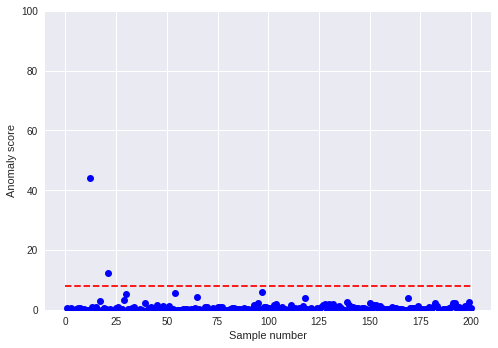

In [0]:
# 結果の描画
plt.plot(num, anomaly_scores, "o", color = "b")
plt.plot([0,200],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.ylim([0,100])
plt.show()

# LOF法

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn import datasets
%matplotlib inline

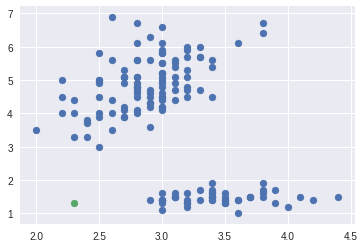

In [4]:
iris = datasets.load_iris()
X = iris.data
 
clf = LocalOutlierFactor(n_neighbors=7, contamination=0.005)
pred = clf.fit_predict(X[:, (1, 2)])
 
# 正常データのプロット
plt.scatter(X[:,1][np.where(pred > 0)], X[:,2][np.where(pred > 0)])
# 異常データのプロット
plt.scatter(X[:,1][np.where(pred < 0)], X[:,2][np.where(pred < 0)])